1. Load the dataset and explore the variables.

In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Load data and check first 5 rows

customer_data = pd.read_csv('customer_churn.csv')
display(customer_data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check shape of dataframe

customer_data.shape

(7043, 21)

In [4]:
# Let's check all variables and their types

customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Let's check the amount of unique values in each variable

customer_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
# From my point of view, the only variable that it's not correctly categorize is TotalCharges but I'll make
# some comments about other variables as well.

# customerID: it's correctly defined as an object because the unique value is a combination of numbers
# and letters

# SeniorCitizen: it's a binary variable as its possible values are 0 and 1 but it's correctly defined as
# an int64

# tenure: it's correctly defined as int64 as their values are numbers

# MonthlyCharges: it's a numerical continuous variable and it's correctly defined as float64

# TotalCharges: it's a numerical continuous variable and, from my point of view, its type should be
# changed from object to float64. Let's do this now...

customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')
customer_data['TotalCharges'].dtypes

dtype('float64')

In [7]:
# Let's review if we have NaN values

customer_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# As the TotalCharges column has NaN values in 11 rows (out of 7043), we will remove them.

def handle_na_values(df: pd.DataFrame) -> pd.DataFrame:
    '''
    This function picks a Pandas DataFrame and cleans null values by dropping rows with specific values. 
    Inputs:
    df: Pandas DataFrame

    Outputs:
    A Pandas DataFrame with rows that doesn't contain NaN values
    '''
    
    rows_to_drop = df[df['TotalCharges'].isna()==True].index
    df = df.drop(rows_to_drop, axis=0, inplace=True)
        
    return df

In [9]:
handle_na_values(customer_data)
display(customer_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
# Reset index and drop "index" created afterwards

customer_data = customer_data.reset_index()
customer_data.drop(['index'], axis=1, inplace=True)
display(customer_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# We could clean this dataset a little bit more by transforming those columns with "Yes"/"No" values to
# "0"/"1" but, as their are not gonna participate from our machine learning model, we will leave them with
# the current values.

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [12]:
# In our machine learning model we are gonna work with the following variables:

# tenure: variable used for prediction. Numerical discrete.

# SeniorCitizen: variable used for prediction. Binary.

# MonthlyCharges: variable used for prediction. Numerical continuous.

# Churn: predicted variable. Binary.

/Users/lucia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


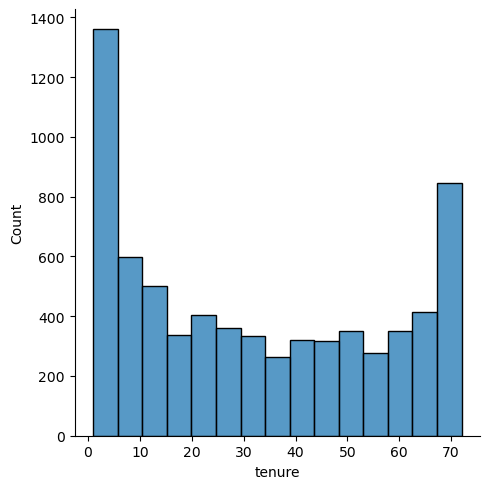

0.23773083190513133

In [13]:
# Let's review the variable tenure:

import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(customer_data['tenure'])
plt.show()

customer_data['tenure'].skew()

# For the value of the skewness, we can imply that the distribution of this variable is symmetrical.

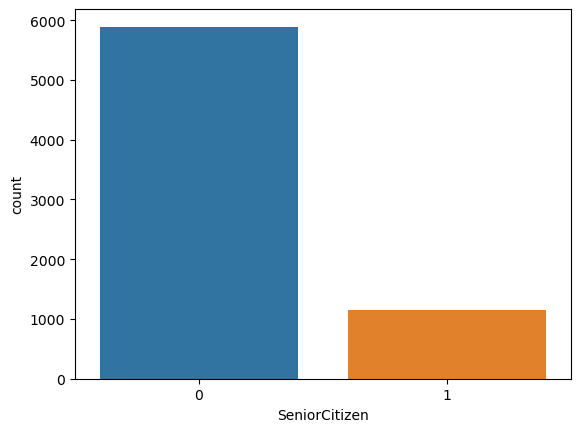

In [14]:
# Let's review the variable "SeniorCitizen":

sns.countplot(x = 'SeniorCitizen', data = customer_data)
plt.show()

# We have imbalanced data for one of the variables that will help us predict the model but we won't use
# any technique to fix this at the moment as we are exploring the variables in this step.

/Users/lucia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


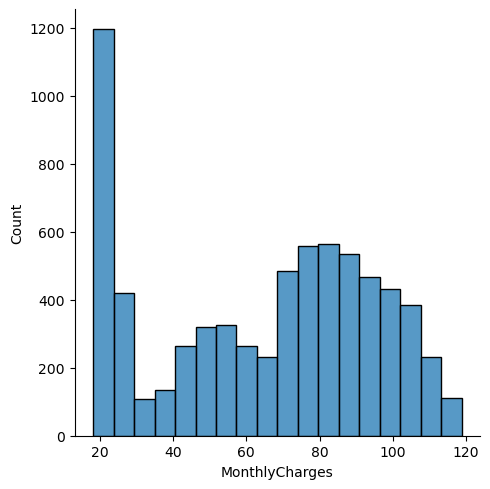

-0.22210292770166232

In [15]:
# MonthlyCharges

sns.displot(customer_data['MonthlyCharges'])
plt.show()

customer_data['MonthlyCharges'].skew()

# For the value of the skewness, we can imply that the distribution of this variable is symmetrical.

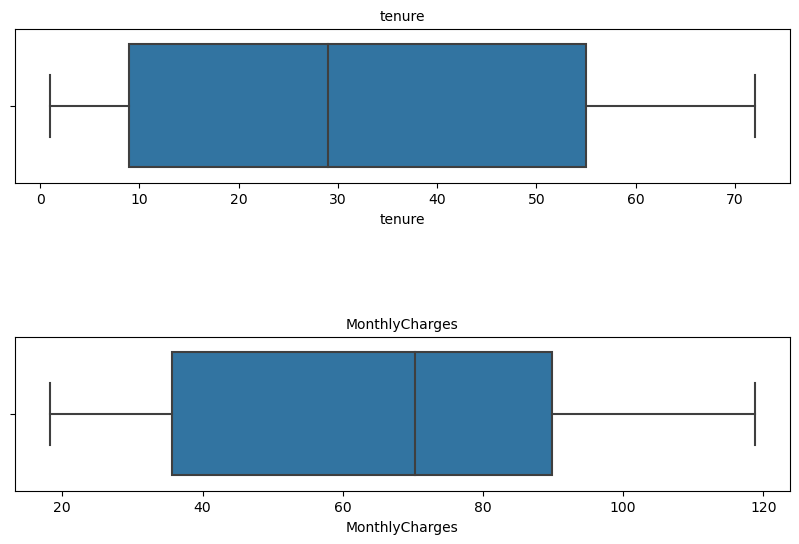

In [16]:
# Let's check for outliers on both tenure and MonthlyCharges variables

outliers_columns = customer_data[['tenure','MonthlyCharges']]

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for value, col in enumerate(outliers_columns):
    sns.boxplot(x=outliers_columns[col], ax=axes[value])
    axes[value].set_title(col, fontsize=10) 

plt.subplots_adjust(hspace=1)      
    
plt.show()

# There are no outliers to deal with in both variables.

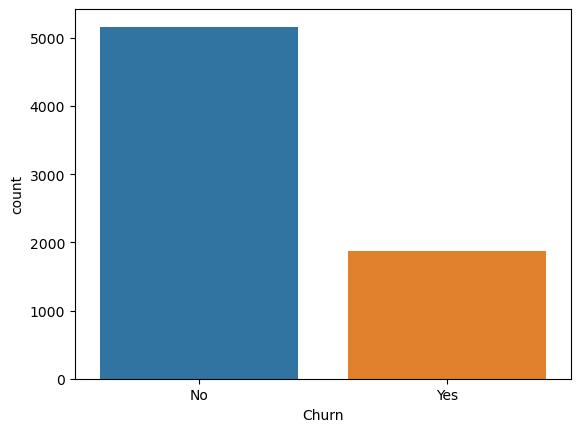

In [17]:
# Let's review the variable "Churn":

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data = customer_data)
plt.show()

# As we can see here, we have imbalanced data for the variable that we want to predict.
# We will take care of this in the end of the lab.

3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [18]:
# Create dataframe only with the previous 4 variables and display datafram

customer_data_ml = customer_data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
display(customer_data_ml)

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7027,24,0,84.80,No
7028,72,0,103.20,No
7029,11,0,29.60,No
7030,4,1,74.40,Yes


In [19]:
# Split dataframe into X and y

y = customer_data_ml['Churn']
X = customer_data_ml.drop(['Churn'], axis=1)

In [20]:
# Split data into train and test set for both X and y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

# This retrieves a numpy array. Therefore, we need to create dataframes for our X_train and X_test sets

In [21]:
# Create dataframe for X_train and X_test

X_train_df = pd.DataFrame(X_train, columns = X.columns).reset_index(drop=True)
X_test_df = pd.DataFrame(X_test, columns = X.columns).reset_index(drop=True)

In [22]:
# Display datasets

#display(X_train_df)
display(X_test_df)

,tenure,SeniorCitizen,MonthlyCharges
0,21,0,106.10
1,1,0,74.90
2,61,0,99.15
3,8,0,60.00
4,37,0,62.80
...,...,...,...
1402,46,0,19.40
1403,9,0,68.95
1404,7,1,76.45
1405,1,0,74.60


In [23]:
# Transform and pre-process numerical data in order to have consistency between values

from sklearn.preprocessing import MinMaxScaler

numerical_scaler = MinMaxScaler() # Define scaler

numerical_scaler.fit(X_train_df) # Fit train set

# For the purpose of this lab, we won't store the scaler

# Apply transformer to both train and test set (this action will retrieve a numpy array)

X_train_scaled = numerical_scaler.transform(X_train_df)
X_test_scaled = numerical_scaler.transform(X_test_df)

In [24]:
# Let's create dataframes

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test_df.columns)

In [25]:
# Display dataframes

#display(X_train_scaled_df)
display(X_test_scaled_df)

,tenure,SeniorCitizen,MonthlyCharges
0,0.281690,0.0,0.873941
1,0.000000,0.0,0.563029
2,0.845070,0.0,0.804684
3,0.098592,0.0,0.414549
4,0.507042,0.0,0.442451
...,...,...,...
1402,0.633803,0.0,0.009965
1403,0.112676,0.0,0.503737
1404,0.084507,1.0,0.578475
1405,0.000000,0.0,0.560040


4. Build the logistic regression model.

In [28]:
# Import model and train it with our set

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'multinomial')

classification.fit(X_train_scaled_df, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [32]:
# Making predictions

y_test_pred = classification.predict(X_test_scaled_df)

5. Evaluate the model.

In [33]:
# Create a confussion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred) # The confusion matrix is created with the real values and the predicted ones

array([[927, 103],
       [203, 174]])

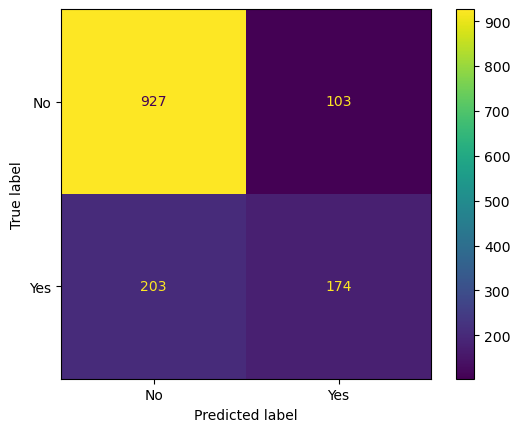

In [34]:
# Plot the confusion matrix

cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test, display_labels = classification.classes_)
disp.plot()
plt.show()

# From the confusion matrix we can see that the models predicts the following:

# 1. For those customers that will stop using the service, the model predicts that correctly for only 174
# 2. For those customers that WON'T stop using the service, the model predicts that correctly for 927
# 3. For those customers that will stop using the service, the model predicts that 203 won't do that
# 4. For those customers that WON'T stop using the service, the model predicts that 103 will stop using it

In [35]:
# Let's create a classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

# Our model predicted the following:

# 1. Out of the customers that the model predicted that will stop the service, only 63% actually did.

# 2. Out of all customers that actually will stop using the service, the model predicted the right
# outcome for only 46%.

# 3. As the F1-score is not close to 1, the model does a bad job to predict if customers will stop or 
# not using the service.

# 4. Having said that, the predictions are better for the "No" values than the "Yes" ones - This is 
# understandable as we mention, in the middle of the lab, that there was a significant imbalanced data
# in our dataset for the target variable.

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1030
         Yes       0.63      0.46      0.53       377

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [36]:
# Let's calculate the Kappa score

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

# The kappa score shows us that our model is not that good

0.39472811111735917

6. Even a simple model will give us more than 70% accuracy. Why?

From my point of view, even a simple machine learning model can give us more than 70% of accuracy because of data cleaning and pre-processing/transformation processes in values that are performed before applying these models. Also, during the data exploration process issues as outliers and over or under sampling can be addressed in order for the model to perform in a better way and have bigger accuracy levels.

7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [37]:
# Let's apply SMOTE into our dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled_df,y_train) # We are applying SMOTE on our
# scaled train test so that we don't have to pre-process/transform the data again

In [38]:
# Review X train sets shapes (before and after SMOTE)

print(X_train.shape)
print(X_train_SMOTE.shape)

# The shape of our SMOTE train set has increased

(5625, 3)
(8266, 3)


In [39]:
# Let's check value counts

y_train_SMOTE.value_counts()

# There's no more imbalanced data in our train set

Churn
No     4133
Yes    4133
Name: count, dtype: int64

In [40]:
# Train our model with our SMOTE set

classification.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(multi_class='multinomial', random_state=0)

In [49]:
# Making predictions with our trained model (after SMOTE) on our original set

y_test_pred_2 = classification.predict(X_test_scaled_df)

In [51]:
# Create a confussion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred_2)

array([[754, 276],
       [110, 267]])

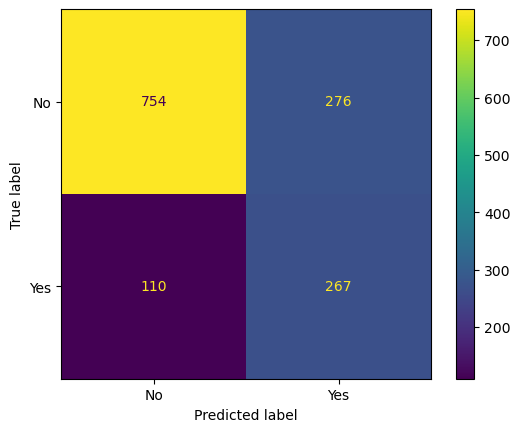

In [52]:
# Plot the confusion matrix

cm_test_2 = confusion_matrix(y_test, y_test_pred_2)

disp = ConfusionMatrixDisplay(cm_test_2, display_labels = classification.classes_)
disp.plot()
plt.show()

# From the confusion matrix we can see that the models predicts the following:

# 1. For those customers that will stop using the service, the model predicts that correctly for 267
# 2. For those customers that WON'T stop using the service, the model predicts that correctly for 754
# 3. For those customers that will stop using the service, the model predicts that 267 won't do that
# 4. For those customers that WON'T stop using the service, the model predicts that 276 will stop using it

In [47]:
# Let's create a classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          No       0.87      0.73      0.80      1030
         Yes       0.49      0.71      0.58       377

    accuracy                           0.73      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.77      0.73      0.74      1407



In [48]:
# Let's calculate the Kappa score

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

# The kappa score shows us that our model is still not good

0.3863379049917629

In [53]:
# From my point of view, after applying SMOTE the model got better in predicted some scenarios but got
# worse in predicting others. Also, its accuracy has decreased from 78% to 73%. Therefore, I don't 
# think that applying SMOTE was something the contributed to my model's performance.